**Import Necessary Libraries**

**This dataset is about Placement data of students based on different features. <br>
Key features are CGPA, Internships, No of projects, # of workshops conducted, certifications, Aptitude Score, HSE and SSC marks. Baed on the features, the class variable PlacementStatus is defined.**

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

**Load the DataSet <br>
Print Top 5 Rows <br>
Describe the Dataset <br>
Print the Shape of Dataset**

In [162]:
df = pd.read_csv('placementdata.csv')
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [163]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [164]:
df.shape

(10000, 12)

**Print the Information about Dataset**

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


**Convert Object types into Category**

In [166]:
# Identify object type columns
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to category type
for col in object_columns:
    df[col] = df[col].astype('category')

# Check the data types to confirm the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   StudentID                  10000 non-null  int64   
 1   CGPA                       10000 non-null  float64 
 2   Internships                10000 non-null  int64   
 3   Projects                   10000 non-null  int64   
 4   Workshops/Certifications   10000 non-null  int64   
 5   AptitudeTestScore          10000 non-null  int64   
 6   SoftSkillsRating           10000 non-null  float64 
 7   ExtracurricularActivities  10000 non-null  category
 8   PlacementTraining          10000 non-null  category
 9   SSC_Marks                  10000 non-null  int64   
 10  HSC_Marks                  10000 non-null  int64   
 11  PlacementStatus            10000 non-null  category
dtypes: category(3), float64(2), int64(7)
memory usage: 732.9 KB
None


**Print columns with null values**

In [167]:
# Find columns with null values
null_columns = df.columns[df.isnull().any()]

# Display the count of null values in each column
null_counts = df[null_columns].isnull().sum()

# Print the columns with null values and their counts
print("Columns with null values and their counts:")
print(null_counts)

Columns with null values and their counts:
Series([], dtype: float64)


**There are no missing values in DataSet <br>
Next convert Category columns into Numerical values**

In [168]:
# Convert specific category columns to numerical values
category_columns = ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']
for col in category_columns:
    df[col] = df[col].cat.codes

# Check the first few rows to confirm the changes
print(df.head())

   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0                 65               4.4                          0   
1                 90               4.0                          1   
2                 82               4.8                          1   
3                 85               4.4                          1   
4                 86               4.5                          1   

   PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                  0         61         79                0  
1                  1         78   

**Split the dataset into training and testing sets (e.g., 80-20 split)**

In [169]:
# Define the features (X) and the target (y)
df = df.drop(columns=['StudentID']) #Dropping irrelevant columns
X = df.drop('PlacementStatus', axis=1)
y = df['PlacementStatus']
X_train, X_test, y_train, y_test = train_test_split(df.drop('PlacementStatus', axis=1), df['PlacementStatus'], test_size=0.2, random_state=42)

**Implement Naive Byes Model Implementation**

In [170]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['True'], colnames=['Predicted'], margins = True)


Predicted,0,1,All
True,,,
0,925,247,1172
1,166,662,828
All,1091,909,2000


Accuracy: 0.79
Confusion Matrix:
[[925 247]
 [166 662]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1172
           1       0.73      0.80      0.76       828

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000



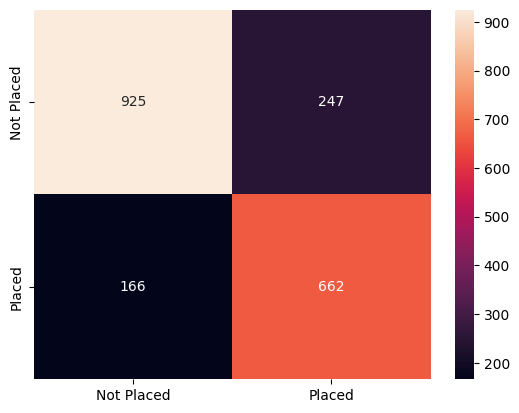

In [171]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

**Plot ROC Curve and AUC Score**

AUC Score for Naïve Bayes: 0.8756


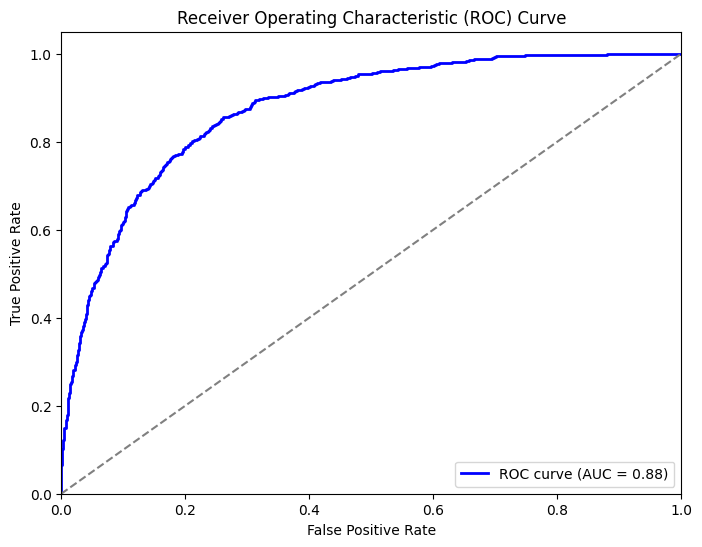

In [172]:
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score for Naïve Bayes: {roc_auc:.4f}")
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Model Implementation using Logistic Regression**

In [173]:
# Define the model
log_model = LogisticRegression(random_state=42, max_iter=1500, solver='newton-cg')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Evaluate the model
accuracy_log = accuracy_score(y_test, y_pred_log)
pd.crosstab(y_test, y_pred_log, rownames = ['True'], colnames=['Predicted'], margins = True)


Predicted,0,1,All
True,,,
0,954,218,1172
1,193,635,828
All,1147,853,2000


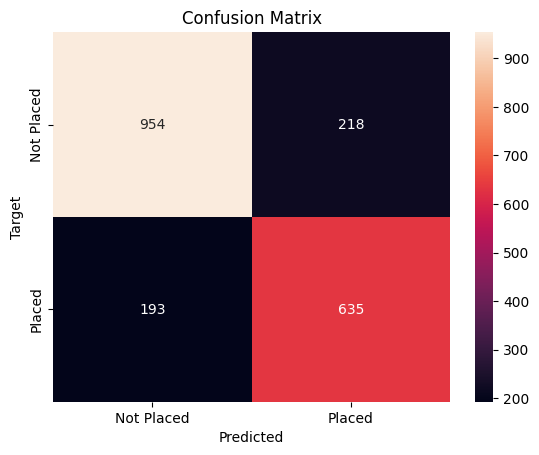

Accuracy: 0.79
Confusion Matrix:
[[954 218]
 [193 635]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1172
           1       0.74      0.77      0.76       828

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000



In [174]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix_log, annot=True, fmt="d", xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.show()
class_report_log = classification_report(y_test, y_pred_log)

# Print the evaluation results
print(f"Accuracy: {accuracy_log:.2f}")
print("Confusion Matrix:")
print(conf_matrix_log)
print("Classification Report:")
print(class_report_log)

**Logistic Regression. Plot ROC Curve and AUC Score**

AUC Score for Logistic Regression: 0.8768


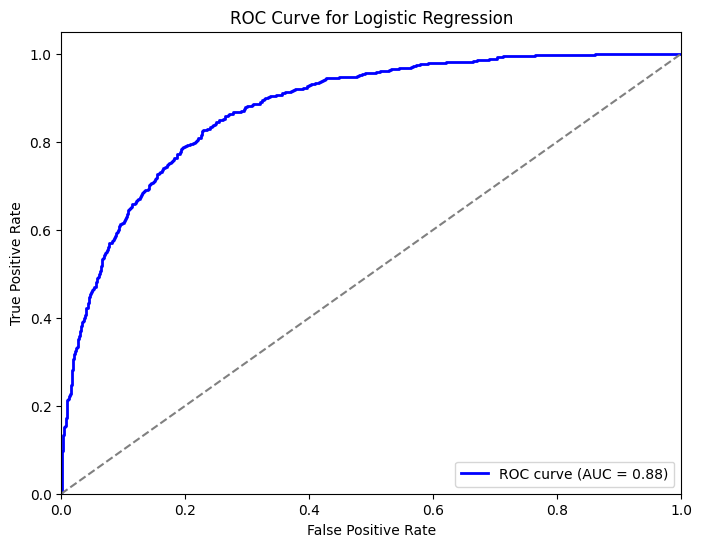

In [175]:
# Predict probabilities
y_probs_log = log_model.predict_proba(X_test)[:, 1]  # Probability of the positive class (Placed)

# Compute ROC curve and AUC score
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs_log)
roc_auc_log = auc(fpr_log, tpr_log)
print(f"AUC Score for Logistic Regression: {roc_auc_log:.4f}")
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

**Conclusion and Analysis <br>**
Accuracy from Naive Bayes is **0.79** and Logistic Regression is **0.79** too. <br>
Logistic Regression have higher recall(**0.81**) than Naive Bayes (**0.79**)<br>
Naive Bayes have higher precision (**0.85**) than Logistic Regression(**0.83**) <br>
Both Models have same f1-score of (**0.82**) <br>
Logistic Regression had better AUC Score of **0.8769** than Naive Bayes <br>
**General Observations:** <br>
Naïve Bayes is often better with small datasets and text-based data. <br>
Logistic Regression is more stable when data is well-structured and follows a linear decision boundary. <br>
ROC Curve shows which model works better across all classification thresholds.<br>